In [4]:
!pip install sympy

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   -------------------------------

In [8]:
import time
import sympy
import random
import matplotlib.pyplot as plt
from sympy import mod_inverse

In [9]:
def generate_prime(digits):
    """Generates a random prime number with the specified number of digits."""
    lower = 10**(digits-1)
    upper = 10**digits - 1
    return sympy.randprime(lower, upper)

In [10]:
def compute_rsa_decryption_key(p, q, e):
    """Computes the RSA decryption key d given p, q, and e."""
    n = p * q
    phi_n = (p - 1) * (q - 1)
    d = mod_inverse(e, phi_n)
    return d

In [11]:
# Given example (p=43, q=59, e=13)
p1, q1, e1 = 43, 59, 13
start_time = time.time()
d1 = compute_rsa_decryption_key(p1, q1, e1)
time_taken1 = time.time() - start_time


In [12]:
# List of digit sizes
digit_sizes = [4, 6, 8, 10]
computation_times = []

In [13]:
for digits in digit_sizes:
    p = generate_prime(digits)
    q = generate_prime(digits)
    e = 65537  # Common choice for e
    
    start_time = time.time()
    d = compute_rsa_decryption_key(p, q, e)
    time_taken = time.time() - start_time
    computation_times.append(time_taken)
    
    print(f"Digits: {digits}, p: {p}, q: {q}, d: {d}, Time: {time_taken:.6f} sec")

Digits: 4, p: 3137, q: 5407, d: 9902849, Time: 0.000022 sec
Digits: 6, p: 514177, q: 603541, d: 109187210753, Time: 0.000024 sec
Digits: 8, p: 95605591, q: 47053891, d: 3623493357125873, Time: 0.000030 sec
Digits: 10, p: 6590092331, q: 1373050013, d: 2832867902200224913, Time: 0.000029 sec


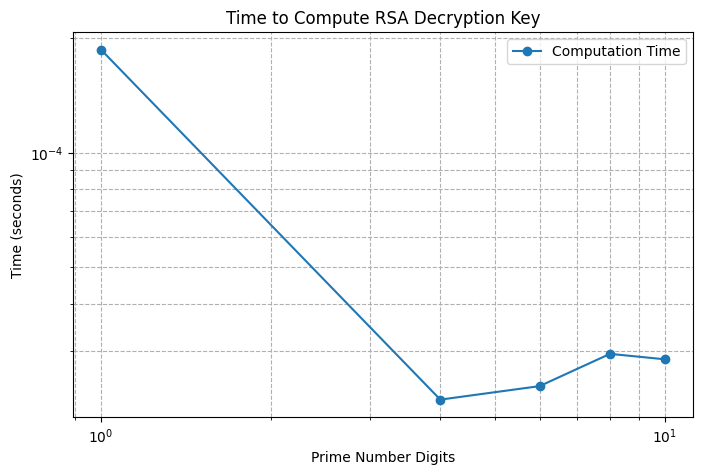

In [16]:
# Plot the results
plt.figure(figsize=(8,5))
plt.plot([1] + digit_sizes, [time_taken1] + computation_times, marker='o', linestyle='-', label='Computation Time')
plt.xlabel('Prime Number Digits')
plt.ylabel('Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('Time to Compute RSA Decryption Key')
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()